# **Comparing Audio Features of 1940-1949 US Billboard #1 Singles and 2022 Billboard Top 100 Songs**

![](https://www.billboard.com/wp-content/uploads/media/Billboard-charts-july-27-1940-bb-1548.jpg?w=942&h=623&crop=1&resize=942%2C623)

*Billboard* Magazine began publishing its charts tracking the popularity of record sales in 1940. Today, the Billboard Hot 100 is the industry standard for ranking the popularity of commercial music. Nowadays, chart rankings are based on both online and physical sales, streaming, and radio play.

For this project, I used the Spotify API to scrape data from a playlist containing songs from Billboard Hot 100 #1 singles from the years 1940 to 1949, and another playlist containing the year-end Billboard Hot 100 songs for 2022. The data includes audio features (determined via Spotify's algorithm) that describe each song's characteristics like its popularity, danceability, and how likely it is to be an acoustic track.

Analyzing and comparing the features from both playlists helps to shed light on what audio features characterized music from each time period, and on how music has changed over the years.

In [150]:
def getplaylist(uri):
    track_names = []
    artist_names = []
    track_pops = []
    acousticness_list = []
    danceability_list = []
    energy_list = []
    instrumentalness_list = []
    liveness_list = []
    loudness_list = []
    speechiness_list = []
    tempo_list = []
    time_signature_list = []
    duration_list = []
    key_list = []
    mode_list = []
    valence_list = []
    for track in sp.playlist_tracks(uri)["items"]:
        #URI
        track_uri = track["track"]["uri"]
        features = sp.audio_features(track_uri)
    
        #Audio features
        acousticness = features[0]['acousticness']
        danceability = features[0]['danceability']
        energy = features[0]['energy']
        instrumentalness = features[0]['instrumentalness']
        liveness = features[0]['liveness']
        loudness = features[0]['loudness']
        speechiness = features[0]['speechiness']
        tempo = features[0]['tempo']
        time_signature = features[0]['time_signature']
        duration_ms = features[0]['duration_ms']
        key = features[0]['key']
        mode = features[0]['mode']
        valence = features[0]['valence']
    
        acousticness_list.append(acousticness)
        danceability_list.append(danceability)
        energy_list.append(energy)
        instrumentalness_list.append(instrumentalness)
        liveness_list.append(liveness)
        loudness_list.append(loudness)
        speechiness_list.append(speechiness)
        tempo_list.append(tempo)
        time_signature_list.append(time_signature)
        duration_list.append(duration_ms)
        key_list.append(key)
        mode_list.append(mode)
        valence_list.append(valence)
        
        #Track name
        track_name = track["track"]["name"]
        track_names.append(track_name)
        
        #Main Artist
        artist_uri = track["track"]["artists"][0]["uri"]
        artist_info = sp.artist(artist_uri)
        
        #Name, popularity, genre
        artist_name = track["track"]["artists"][0]["name"]
        artist_pop = artist_info["popularity"]
        artist_genres = artist_info["genres"]
        artist_names.append(artist_name)
        
        #Album
        album = track["track"]["album"]["name"]
        
        #Popularity of the track
        track_pop = track["track"]["popularity"]
        track_pops.append(track_pop)

        df_playlist = pd.DataFrame({'track_name': track_names, 'artist_name': artist_names, 'duration_ms': duration_list, 'popularity': track_pops, 'key': key_list, 'mode': mode_list, 'valence': valence_list, 'acousticness': acousticness_list, 'danceability': danceability_list, 'energy': energy_list, 'instrumentalness': instrumentalness_list, 'liveness': liveness_list, 'loudness': loudness_list, 'speechiness': speechiness_list, 'tempo': tempo_list, 'time_signature': time_signature_list})
    return df_playlist

In [129]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')

cid = 'client_id'
secret = 'client_secret'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [24]:
playlist_link = "https://open.spotify.com/playlist/245g9upOJ2BLTCcKeFyRDf?si=4cb0d39aa263410c"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [66]:
track_names = []
artist_names = []
track_pops = []
acousticness_list = []
danceability_list = []
energy_list = []
instrumentalness_list = []
liveness_list = []
loudness_list = []
speechiness_list = []
tempo_list = []
time_signature_list = []
duration_list = []
key_list = []
mode_list = []
valence_list = []

for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    features = sp.audio_features(track_uri)

    #Audio features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    duration_ms = features[0]['duration_ms']
    key = features[0]['key']
    mode = features[0]['mode']
    valence = features[0]['valence']

    acousticness_list.append(acousticness)
    danceability_list.append(danceability)
    energy_list.append(energy)
    instrumentalness_list.append(instrumentalness)
    liveness_list.append(liveness)
    loudness_list.append(loudness)
    speechiness_list.append(speechiness)
    tempo_list.append(tempo)
    time_signature_list.append(time_signature)
    duration_list.append(duration_ms)
    key_list.append(key)
    mode_list.append(mode)
    valence_list.append(valence)
    
    #Track name
    track_name = track["track"]["name"]
    track_names.append(track_name)
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    artist_names.append(artist_name)
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    track_pops.append(track_pop)

    audio_features.append(sp.audio_features(track_uri))


In [83]:
df = pd.DataFrame({'track_name': track_names, 'artist_name': artist_names, 'duration_ms': duration_list, 'popularity': track_pops, 'key': key_list, 'mode': mode_list, 'valence': valence_list, 'acousticness': acousticness_list, 'danceability': danceability_list, 'energy': energy_list, 'instrumentalness': instrumentalness_list, 'liveness': liveness_list, 'loudness': loudness_list, 'speechiness': speechiness_list, 'tempo': tempo_list, 'time_signature': time_signature_list})

In [68]:
df.head(10)

,track_name,artist_name,duration_ms,popularity,key,mode,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,I'll Never Smile Again,Tommy Dorsey,189467,65,0,1,0.0645,0.993,0.307,0.1440,0.776000,0.4180,-16.383,0.0286,85.827,4
1,Only Forever - Single Version,Bing Crosby,192040,34,4,1,0.2320,0.968,0.238,0.0684,0.000959,0.2580,-18.402,0.0430,66.235,5
2,Frenesi,Artie Shaw,182413,41,9,0,0.8160,0.952,0.500,0.2370,0.093300,0.3080,-12.255,0.0421,149.213,4
3,Song of the Volga Boatmen - Remastered 2002,Glenn Miller,206773,28,10,0,0.5540,0.875,0.862,0.2350,0.478000,0.4620,-10.464,0.0666,125.453,4
4,Amapola,Jimmy Dorsey,206512,28,2,0,0.4150,0.974,0.444,0.1140,0.002270,0.0726,-16.643,0.0491,101.808,4
5,Maria Elena - Remastered,Jimmy Dorsey,183161,24,2,0,0.1640,0.992,0.291,0.1090,0.005110,0.1830,-16.079,0.0327,89.571,4
6,Daddy,Sammy Kaye,176133,33,10,1,0.6570,0.734,0.862,0.2670,0.000015,0.1070,-10.772,0.0424,130.853,4
7,Green Eyes - Remastered,Jimmy Dorsey,199658,24,5,0,0.5070,0.851,0.519,0.2310,0.000001,0.3720,-12.741,0.1810,169.273,4
8,Blue Champagne - Remastered,Jimmy Dorsey,184714,27,7,0,0.3790,0.900,0.525,0.2170,0.004700,0.0885,-11.910,0.0296,99.393,4
9,Piano Concerto in B-Flat (Tonight We Love),Freddy Martin & His Orchestra,193907,23,1,1,0.3810,0.987,0.413,0.2180,0.913000,0.0996,-12.858,0.0307,78.534,4


In [69]:
df.tail(10)

,track_name,artist_name,duration_ms,popularity,key,mode,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
76,Twelfth Street Rag,Pee Wee Hunt,174027,19,10,1,0.943,0.551,0.530,0.5700,0.911000,0.102,-7.942,0.0559,105.621,4
77,A Tree In The Meadow - Remastered 1990,Margaret Whiting,154400,24,5,1,0.217,0.868,0.246,0.2220,0.000000,0.261,-10.077,0.0281,98.959,4
78,Buttons and Bows - 78rpm Version,Dinah Shore & Her Harper Valley Boys,120973,20,0,1,0.885,0.952,0.593,0.0907,0.000031,0.158,-14.639,0.0860,180.758,4
79,A Little Bird Told Me,Paula Watson,158877,0,4,0,0.719,0.672,0.808,0.5620,0.000000,0.169,-3.694,0.0437,91.246,4
80,Cruisin' Down The River,Russ Morgan & His Orchestra Vocal by The Skylarks,156187,0,9,1,0.930,0.731,0.615,0.3790,0.000000,0.418,-9.866,0.0280,98.266,3
81,Riders In the Sky,Vaughn Monroe,176707,30,9,1,0.336,0.957,0.428,0.5870,0.000021,0.190,-5.039,0.0327,126.574,3
82,Some Enchanted Evening,Perry Como,208467,30,0,1,0.231,0.934,0.193,0.0950,0.001900,0.324,-17.551,0.0362,89.418,3
83,You're Breaking My Heart,Vic Damone With Orchestra,192000,16,10,1,0.211,0.925,0.307,0.1640,0.000000,0.436,-10.446,0.0336,114.074,5
84,That Lucky Old Sun,Frankie Laine,211107,24,2,1,0.273,0.911,0.345,0.1560,0.000050,0.113,-16.170,0.0313,104.780,5
85,Mule Train,Frankie Laine,155813,19,5,1,0.614,0.789,0.679,0.4490,0.000000,0.169,-10.407,0.0802,148.027,4


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        86 non-null     object 
 1   artist_name       86 non-null     object 
 2   duration_ms       86 non-null     int64  
 3   popularity        86 non-null     int64  
 4   key               86 non-null     int64  
 5   mode              86 non-null     int64  
 6   valence           86 non-null     float64
 7   acousticness      86 non-null     float64
 8   danceability      86 non-null     float64
 9   energy            86 non-null     float64
 10  instrumentalness  86 non-null     float64
 11  liveness          86 non-null     float64
 12  loudness          86 non-null     float64
 13  speechiness       86 non-null     float64
 14  tempo             86 non-null     float64
 15  time_signature    86 non-null     int64  
dtypes: float64(9), int64(5), object(2)
memory usag

In [ ]:
# frequency of keys
# frequency of time signatures
# proportion major/minor
# avg duration, max/min duration
# mean/median valence	acousticness	danceability	energy	instrumentalness	liveness	loudness	speechiness	tempo
# features correlation
# most frequent artists
# create duration in minutes column

In [76]:
# check for duplicated rows
df.duplicated().sum()

0

In [85]:
# change types of 'key' and 'mode' columns to string
df['key'] = df['key'].astype('str')
df['mode'] = df['mode'].astype('str')

# map integer keys to written-out keys
# map integer modes to written-out modes

key_dict = {
    '0': "C",
    '1': "C-sharp/D-flat",
    '2': "D",
    '3': "D-sharp/E-flat",
    '4': "E",
    '5': "F",
    '6': "F-sharp/G-flat",
    '7': "G",
    '8': "G-sharp/A-flat",
    '9': "A",
    '10': "A-sharp/B-flat",
    '11': "B"
}

mode_dict = {
    '0': 'Minor',
    '1': 'Major'
}
     
df['key'] = df['key'].map(key_dict)
df['mode'] = df['mode'].map(mode_dict)

In [90]:
# create duration in minutes column
df['duration_min'] = df['duration_ms'] / 60000

In [91]:
df.head()

,track_name,artist_name,duration_ms,popularity,key,mode,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_min
0,I'll Never Smile Again,Tommy Dorsey,189467,65,C,Major,0.0645,0.993,0.307,0.1440,0.776000,0.4180,-16.383,0.0286,85.827,4,3.157783
1,Only Forever - Single Version,Bing Crosby,192040,34,E,Major,0.2320,0.968,0.238,0.0684,0.000959,0.2580,-18.402,0.0430,66.235,5,3.200667
2,Frenesi,Artie Shaw,182413,41,A,Minor,0.8160,0.952,0.500,0.2370,0.093300,0.3080,-12.255,0.0421,149.213,4,3.040217
3,Song of the Volga Boatmen - Remastered 2002,Glenn Miller,206773,28,A-sharp/B-flat,Minor,0.5540,0.875,0.862,0.2350,0.478000,0.4620,-10.464,0.0666,125.453,4,3.446217
4,Amapola,Jimmy Dorsey,206512,28,D,Minor,0.4150,0.974,0.444,0.1140,0.002270,0.0726,-16.643,0.0491,101.808,4,3.441867


In [96]:
# What is the average song duration in minutes? 
# What is shortest song duration?
# What is the longest song duration?
print('Average song duration: ', round(df['duration_min'].mean(),2), 'minutes')
print('Shortest song duration: ', round(df['duration_min'].min(),2), 'minutes')
print('Longest song duration: ', round(df['duration_min'].max(),2), 'minutes')

Average song duration:  3.03 minutes
Shortest song duration:  2.02 minutes
Longest song duration:  3.85 minutes


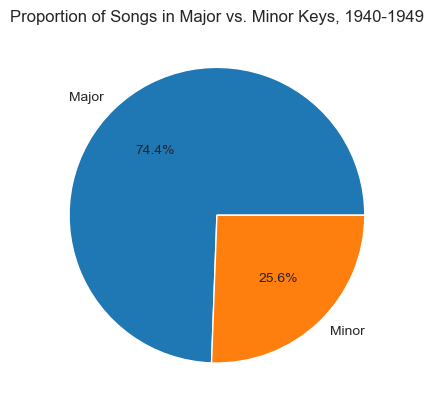

In [378]:
# What percentage of songs are in major/minor key?
plt.pie(df['mode'].value_counts(), labels=['Major','Minor'], autopct='%1.1f%%')
plt.title('Proportion of Songs in Major vs. Minor Keys, 1940-1949')
plt.show()

In [397]:
# What are the most frequent combinations of key and mode?
key_mode_count = df.groupby(['key', 'mode']).size().reset_index().rename(columns={0: 'Count'}).sort_values(by='Count', ascending=False).head(10)
key_mode_count

,key,mode,Count
6,C,Major,10
15,F,Major,10
20,G-sharp/A-flat,Major,9
2,A-sharp/B-flat,Major,9
10,D,Minor,6
11,D-sharp/E-flat,Major,5
18,G,Major,5
0,A,Major,5
8,C-sharp/D-flat,Major,4
9,D,Major,4


In [398]:
key_mode_count['Key and Mode Combination'] = key_mode_count['key'] + ' ' + key_mode_count['mode']

Text(0.5, 1.0, 'Key and Mode Combinations by Song Count, 1940-1949')

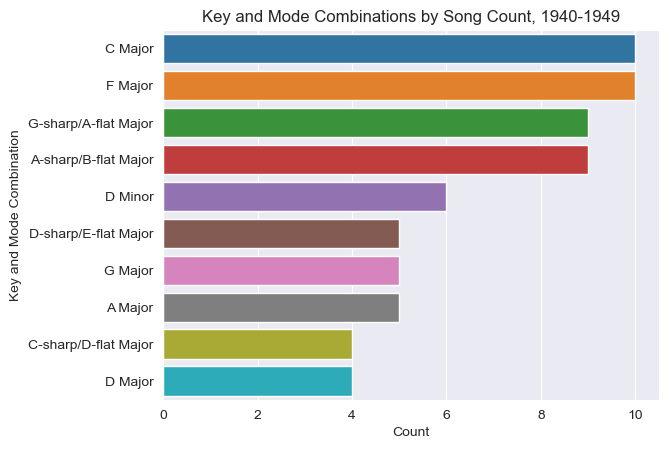

In [399]:
sns.barplot(data=key_mode_count, x='Count', y='Key and Mode Combination', orient='h')
plt.title('Key and Mode Combinations by Song Count, 1940-1949')

The most popular combinations of key and mode are major keys, though there are a significant number of songs written in D minor.

In [114]:
# What artists appear most frequently?
top_artists = df['artist_name'].value_counts().head().reset_index().rename(columns={'index': 'Artist', 'artist_name': 'Total Songs'})
top_artists

,Artist,Total Songs
0,Bing Crosby,7
1,Glenn Miller,6
2,Jimmy Dorsey,6
3,Perry Como,5
4,Harry James,5


Text(0.5, 1.0, 'Top Artists with #1 Songs on Billboard Top 100, 1940-1949')

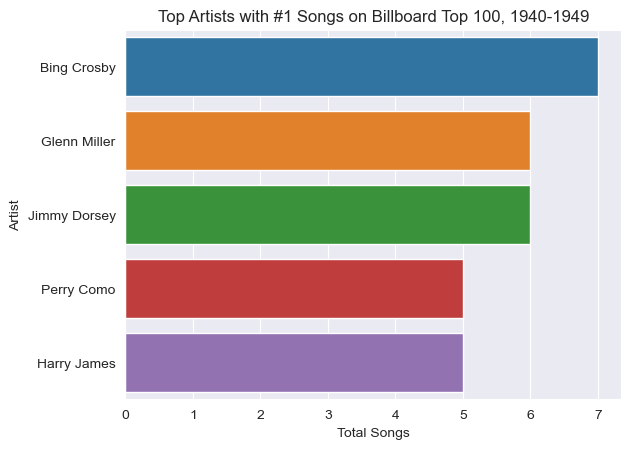

In [118]:
sns.barplot(data=top_artists, x='Total Songs', y='Artist', orient='h')
plt.title('Top Artists with #1 Songs on Billboard Top 100, 1940-1949')

In [145]:
# What are the average values of each audio feature?
columns=['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

for col in columns:
    print(f'Mean {col}:', round(df[col].mean(),3))
    print(f'Median {col}:', round(df[col].median(),3))
    print()

Mean valence: 0.475
Median valence: 0.408

Mean acousticness: 0.886
Median acousticness: 0.949

Mean danceability: 0.511
Median danceability: 0.532

Mean energy: 0.218
Median energy: 0.188

Mean instrumentalness: 0.132
Median instrumentalness: 0.001

Mean liveness: 0.213
Median liveness: 0.147

Mean loudness: -13.503
Median loudness: -13.176

Mean speechiness: 0.059
Median speechiness: 0.04

Mean tempo: 108.288
Median tempo: 100.601



In [124]:
df.describe()

,duration_ms,popularity,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_min
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,181544.093023,25.209302,0.475119,0.885890,0.511233,0.218101,0.131744,0.213369,-13.502884,0.058752,108.288291,3.825581,3.025735
std,19408.287581,13.273695,0.264469,0.152499,0.191542,0.146628,0.281237,0.158721,3.559514,0.056868,30.851034,0.671992,0.323471
min,120973.000000,0.000000,0.064500,0.098500,0.168000,0.037500,0.000000,0.057200,-21.128000,0.028000,47.110000,1.000000,2.016217
25%,169937.000000,19.250000,0.243500,0.844000,0.340250,0.122000,0.000002,0.101250,-16.344500,0.033625,81.521000,4.000000,2.832283
50%,183613.000000,24.000000,0.408000,0.949000,0.531500,0.187500,0.001090,0.147000,-13.176000,0.040400,100.600500,4.000000,3.060217
75%,192736.750000,30.000000,0.673500,0.980750,0.677250,0.253750,0.042450,0.298500,-11.143500,0.057700,127.311500,4.000000,3.212279
max,230827.000000,65.000000,0.978000,0.995000,0.942000,0.750000,0.927000,0.899000,-3.694000,0.352000,180.758000,5.000000,3.847117


/var/folders/w7/m_jjkwgd29qgvcnlj18kzz_80000gn/T/ipykernel_29594/4024301695.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

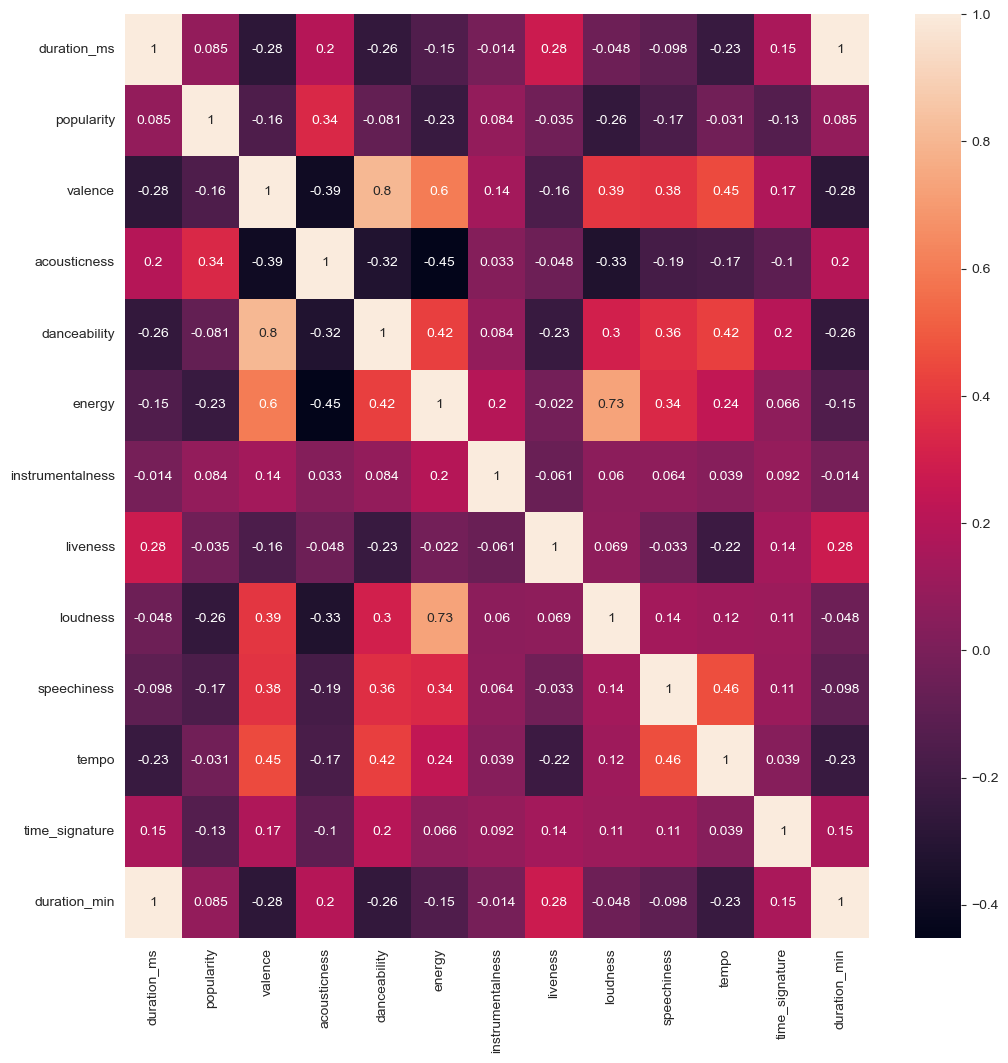

In [123]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

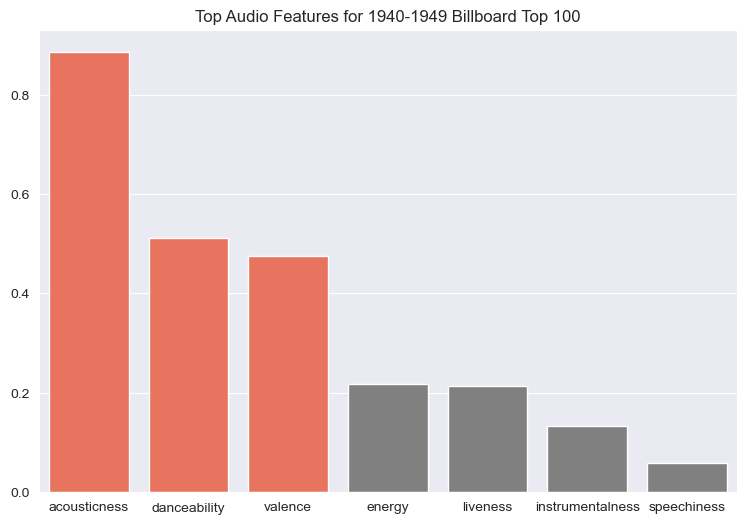

In [318]:
# What are the mean scores for each of the audio features?
features=['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
df_sorted = df[features].mean().reset_index().sort_values(by=0, ascending=False)

plt.figure(figsize=(9,6))
colors = ['grey' if x < 0.4 else 'tomato' for x in [df[col].mean() for col in features]]
sns.barplot(data=df.melt(), x=[col for col in features], y=[df[col].mean() for col in features], order=df_sorted['index'], palette=colors)
plt.title('Top Audio Features for 1940-1949 Billboard Top 100')
plt.show()


In [150]:
def getplaylist(uri):
    track_names = []
    artist_names = []
    track_pops = []
    acousticness_list = []
    danceability_list = []
    energy_list = []
    instrumentalness_list = []
    liveness_list = []
    loudness_list = []
    speechiness_list = []
    tempo_list = []
    time_signature_list = []
    duration_list = []
    key_list = []
    mode_list = []
    valence_list = []
    for track in sp.playlist_tracks(uri)["items"]:
        #URI
        track_uri = track["track"]["uri"]
        features = sp.audio_features(track_uri)
    
        #Audio features
        acousticness = features[0]['acousticness']
        danceability = features[0]['danceability']
        energy = features[0]['energy']
        instrumentalness = features[0]['instrumentalness']
        liveness = features[0]['liveness']
        loudness = features[0]['loudness']
        speechiness = features[0]['speechiness']
        tempo = features[0]['tempo']
        time_signature = features[0]['time_signature']
        duration_ms = features[0]['duration_ms']
        key = features[0]['key']
        mode = features[0]['mode']
        valence = features[0]['valence']
    
        acousticness_list.append(acousticness)
        danceability_list.append(danceability)
        energy_list.append(energy)
        instrumentalness_list.append(instrumentalness)
        liveness_list.append(liveness)
        loudness_list.append(loudness)
        speechiness_list.append(speechiness)
        tempo_list.append(tempo)
        time_signature_list.append(time_signature)
        duration_list.append(duration_ms)
        key_list.append(key)
        mode_list.append(mode)
        valence_list.append(valence)
        
        #Track name
        track_name = track["track"]["name"]
        track_names.append(track_name)
        
        #Main Artist
        artist_uri = track["track"]["artists"][0]["uri"]
        artist_info = sp.artist(artist_uri)
        
        #Name, popularity, genre
        artist_name = track["track"]["artists"][0]["name"]
        artist_pop = artist_info["popularity"]
        artist_genres = artist_info["genres"]
        artist_names.append(artist_name)
        
        #Album
        album = track["track"]["album"]["name"]
        
        #Popularity of the track
        track_pop = track["track"]["popularity"]
        track_pops.append(track_pop)

        df_playlist = pd.DataFrame({'track_name': track_names, 'artist_name': artist_names, 'duration_ms': duration_list, 'popularity': track_pops, 'key': key_list, 'mode': mode_list, 'valence': valence_list, 'acousticness': acousticness_list, 'danceability': danceability_list, 'energy': energy_list, 'instrumentalness': instrumentalness_list, 'liveness': liveness_list, 'loudness': loudness_list, 'speechiness': speechiness_list, 'tempo': tempo_list, 'time_signature': time_signature_list})
    return df_playlist

In [162]:
df_2022 = getplaylist('3I9G1P2NulqwV06ibce61P')

In [163]:
def playlist_clean(df):
    df['key'] = df['key'].astype('str')
    df['mode'] = df['mode'].astype('str')
    
    key_dict = {
    '0': "C",
    '1': "C-sharp/D-flat",
    '2': "D",
    '3': "D-sharp/E-flat",
    '4': "E",
    '5': "F",
    '6': "F-sharp/G-flat",
    '7': "G",
    '8': "G-sharp/A-flat",
    '9': "A",
    '10': "A-sharp/B-flat",
    '11': "B"
    }
    
    mode_dict = {
        '0': 'Minor',
        '1': 'Major'
    }
         
    df['key'] = df['key'].map(key_dict)
    df['mode'] = df['mode'].map(mode_dict)

    df['duration_min'] = df['duration_ms'] / 60000

    return df

In [164]:
df_2022 = playlist_clean(df_2022)

In [431]:
df_2022.head()

,track_name,artist_name,duration_ms,popularity,key,mode,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_min
0,Heat Waves,Glass Animals,238805,92,B,Major,0.531,0.4400,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,4,3.980083
1,As It Was,Harry Styles,167303,91,F-sharp/G-flat,Minor,0.662,0.3420,0.520,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4,2.788383
2,STAY (with Justin Bieber),The Kid LAROI,141806,87,C-sharp/D-flat,Major,0.478,0.0383,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,4,2.363433
3,Easy On Me,Adele,224695,84,F,Major,0.130,0.5780,0.604,0.366,0.000000,0.1330,-7.519,0.0282,141.981,4,3.744917
4,Shivers,Ed Sheeran,207853,69,D,Major,0.822,0.2810,0.788,0.859,0.000000,0.0424,-2.724,0.0856,141.020,4,3.464217


In [167]:
# What is the average song duration in minutes? 
# What is shortest song duration?
# What is the longest song duration?
print('Average song duration: ', round(df_2022['duration_min'].mean(),2), 'minutes')
print('Shortest song duration: ', round(df_2022['duration_min'].min(),2), 'minutes')
print('Longest song duration: ', round(df_2022['duration_min'].max(),2), 'minutes')

Average song duration:  3.28 minutes
Shortest song duration:  2.1 minutes
Longest song duration:  5.49 minutes


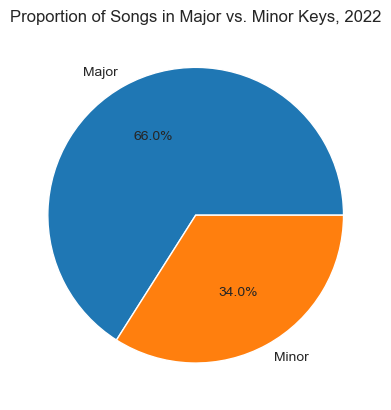

In [379]:
# What percentage of songs are in major/minor key?
plt.pie(df_2022['mode'].value_counts(), labels=['Major','Minor'], autopct='%1.1f%%')
plt.title('Proportion of Songs in Major vs. Minor Keys, 2022')
plt.show()

Songs in major keys still dominate, but have decreased to 66% from 74.4% in 1940-1949.

In [390]:
# What are the most frequent combinations of key and mode?
keymode_2022 = df_2022.groupby(['key', 'mode']).size().reset_index().rename(columns={0: 'Count'}).sort_values(by='Count', ascending=False).head(10)
keymode_2022

,key,mode,Count
7,C-sharp/D-flat,Major,13
9,D,Major,10
21,G-sharp/A-flat,Major,9
5,C,Major,7
15,F,Major,6
13,E,Major,6
0,A,Major,5
16,F,Minor,5
19,G,Major,4
22,G-sharp/A-flat,Minor,4


In [394]:
keymode_2022['Key and Mode Combination'] = keymode_2022['key'] + ' ' + keymode_2022['mode']

Text(0.5, 1.0, 'Key and Mode Combinations by Song Count, 2022')

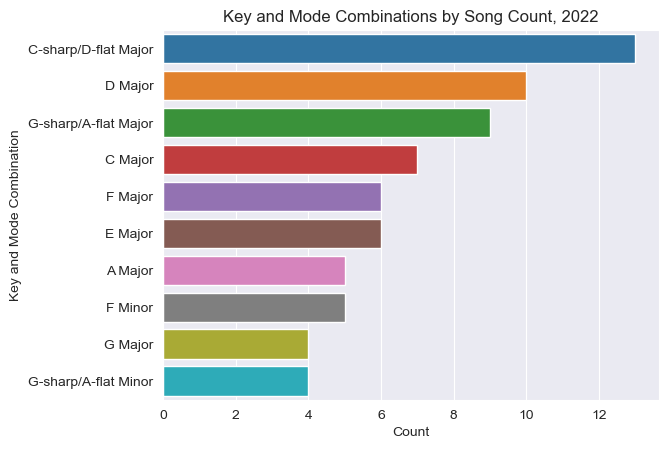

In [393]:
sns.barplot(data=keymode_2022, x='Count', y='Key and Mode Combination', orient='h')
plt.title('Key and Mode Combinations by Song Count, 2022')

The most popular combinations of key and mode are still major keys. C Major, which was dominant in 1940-1949, has fallen in popularity.

In [171]:
# What artists appear most frequently?
top_artists_2022 = df_2022['artist_name'].value_counts().head().reset_index().rename(columns={'index': 'Artist', 'artist_name': 'Total Songs'})
top_artists_2022

,Artist,Total Songs
0,Bad Bunny,7
1,Doja Cat,6
2,Morgan Wallen,3
3,Lil Durk,2
4,Lil Nas X,2


Text(0.5, 1.0, 'Top Artists on 2022 Year End Billboard Top 100')

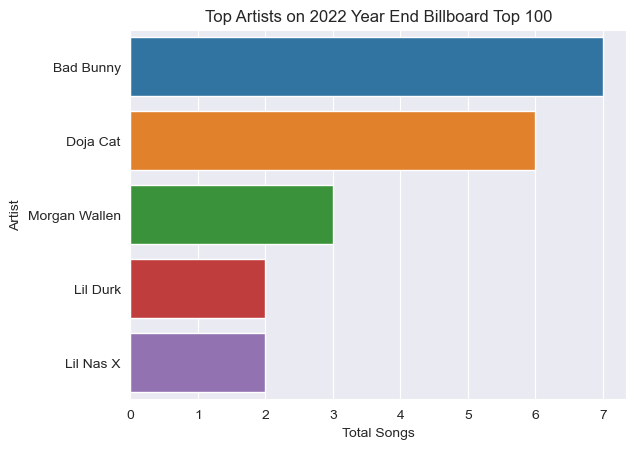

In [172]:
sns.barplot(data=top_artists_2022, x='Total Songs', y='Artist', orient='h')
plt.title('Top Artists on 2022 Year End Billboard Top 100')

In [191]:
# What are the average values of each song feature?
columns=['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

for col in columns:
    print(f'Mean {col}:', round(df_2022[col].mean(),3))
    print(f'Median {col}:', round(df_2022[col].median(),3))
    print()

Mean valence: 0.544
Median valence: 0.538

Mean acousticness: 0.21
Median acousticness: 0.114

Mean danceability: 0.668
Median danceability: 0.657

Mean energy: 0.651
Median energy: 0.662

Mean instrumentalness: 0.0
Median instrumentalness: 0.0

Mean liveness: 0.17
Median liveness: 0.117

Mean loudness: -6.16
Median loudness: -5.87

Mean speechiness: 0.093
Median speechiness: 0.053

Mean tempo: 123.689
Median tempo: 119.706



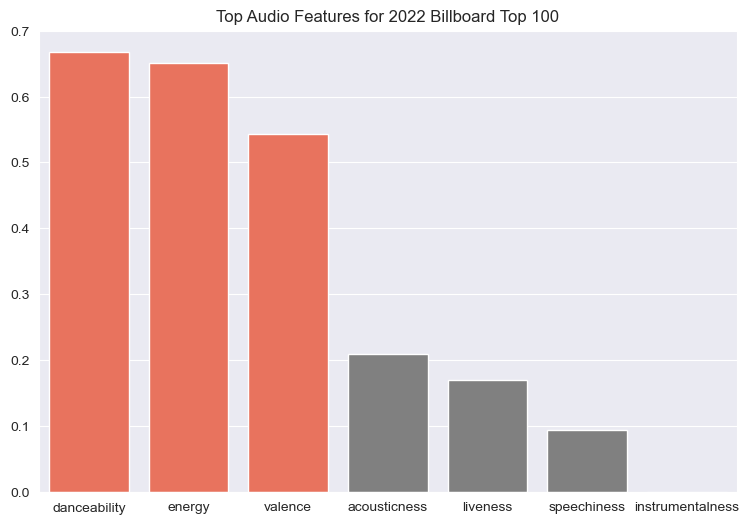

In [317]:
df_2022_sorted = df_2022[features].mean().reset_index().sort_values(by=0, ascending=False)

plt.figure(figsize=(9,6))
colors = ['grey' if x < 0.4 else 'tomato' for x in [df[col].mean() for col in features]]
sns.barplot(data=df.melt(), x=[col for col in features], y=[df_2022[col].mean() for col in features], order=df_2022_sorted['index'], palette=colors)
plt.title('Top Audio Features for 2022 Billboard Top 100')
plt.show()

In [403]:
# Comparing audio features by year
columns=['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']

year_2022 = []
year_1940s = []
for col in columns:
    year_2022.append(round(df_2022[col].mean(),3))
    year_1940s.append(round(df[col].mean(),3))

In [404]:
mean_features = pd.DataFrame(data={'features': columns,
                   '1940-1949': year_1940s,
                   '2022': year_2022
                  })

In [405]:
mean_features = pd.melt(mean_features, id_vars='features', var_name='Year')
mean_features

,features,Year,value
0,valence,1940-1949,0.475
1,acousticness,1940-1949,0.886
2,danceability,1940-1949,0.511
3,energy,1940-1949,0.218
4,instrumentalness,1940-1949,0.132
5,liveness,1940-1949,0.213
6,speechiness,1940-1949,0.059
7,valence,2022,0.544
8,acousticness,2022,0.210
9,danceability,2022,0.668


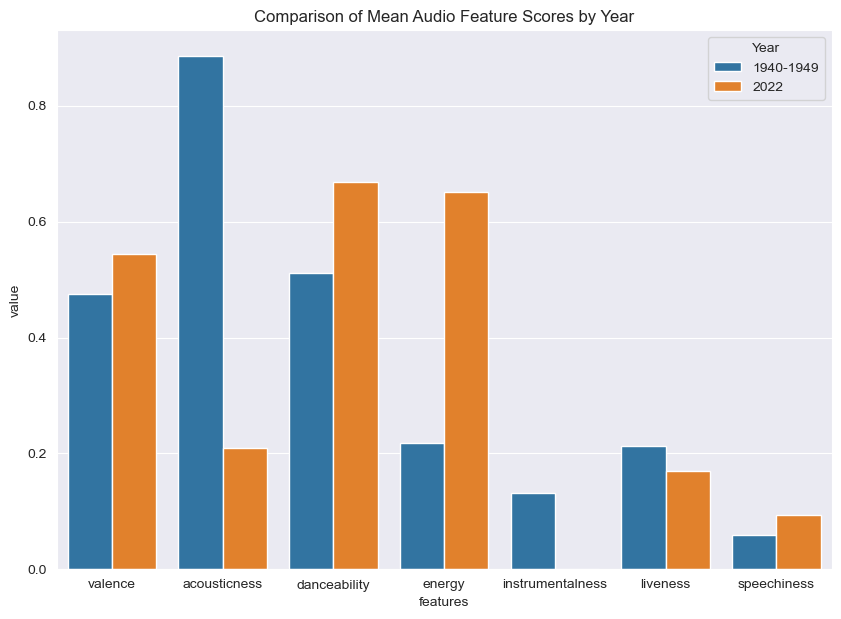

In [427]:
plt.figure(figsize=(10,7))
sns.barplot(data=mean_features, x='features', y='value', hue='Year')
plt.title('Comparison of Mean Audio Feature Scores by Year')
plt.show()

Songs from the 1940-1949 Billboard Top 100 have significantly higher mean acousticness scores.

Songs from the 2022 Billboard Top 100 have notably higher mean danceability and energy scores.

In [364]:
# How did tempo change between 1940-1949 and 2022?
tempo = pd.DataFrame(data={'feature': ['tempo'],
                   '1940-1949': [df['tempo'].mean()],
                   '2022': [df_2022['tempo'].mean()]
                  })
tempo = tempo.melt(id_vars='feature', var_name='Year')

<Axes: xlabel='feature', ylabel='value'>

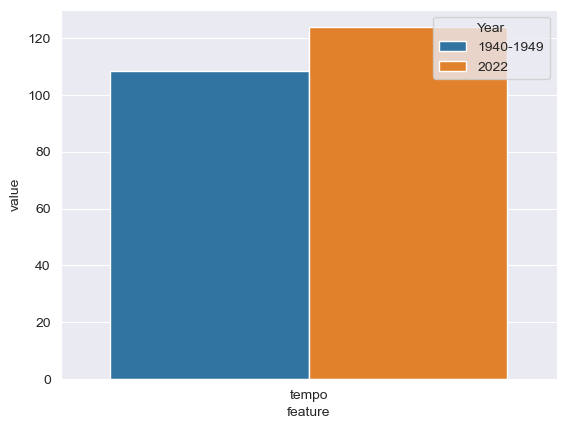

In [365]:
sns.barplot(data=tempo, x='feature', y='value', hue='Year')

The mean tempo of a song has increased from around 108.3 BPM in 1940-1949 to 123.7 BPM in 2022.

In [420]:
# Comparing standard deviation of audio features by year
columns=['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']

year_2022_std = []
year_1940s_std = []
for col in columns:
    year_2022_std.append(round(df_2022[col].std(),3))
    year_1940s_std.append(round(df[col].std(),3))

In [421]:
std_features = pd.DataFrame(data={'features': columns,
                   '1940-1949': year_1940s_std,
                   '2022': year_2022_std
                  })

In [422]:
std_features = pd.melt(std_features, id_vars='features', var_name='Year')
std_features

,features,Year,value
0,valence,1940-1949,0.264
1,acousticness,1940-1949,0.152
2,danceability,1940-1949,0.192
3,energy,1940-1949,0.147
4,instrumentalness,1940-1949,0.281
5,liveness,1940-1949,0.159
6,speechiness,1940-1949,0.057
7,valence,2022,0.235
8,acousticness,2022,0.215
9,danceability,2022,0.137


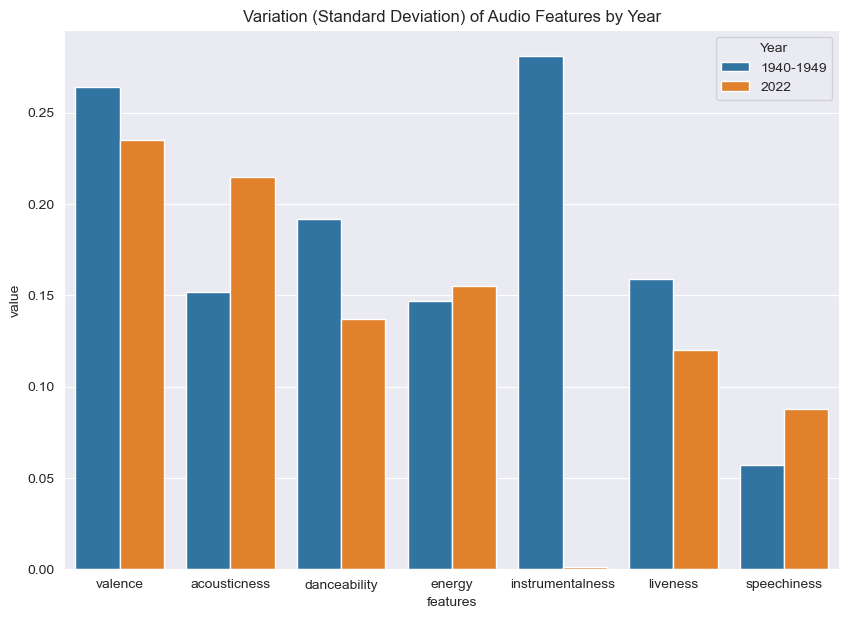

In [425]:
plt.figure(figsize=(10,7))
sns.barplot(data=std_features, x='features', y='value', hue='Year')
plt.title('Variation (Standard Deviation) of Audio Features by Year')
plt.show()

Songs in the 1940-1949 playlist show greater variability in instrumentalness scores.

Songs in the 2022 playlist show greater variability in acousticness.

# **Key Insights**

- In both playlists, songs in major keys are more popular than minor keys.
- The most prominent features of songs in the 1940s playlist are, in order, acousticness, danceability, and valence. The most prominent features of songs in the 2022 playlist are danceability, energy, and valence.
- Songs in the 1940-1949 playlist are significantly higher in acousticness.
- Songs in the 2022 playlist are significantly higher in danceability and energy.
- Mean tempo has increased around 15 BPM, adding to the more energetic feeling of the modern playlist.

In [ ]:
# artist genres